# RME gold files
This notebook plots the gold files for the RME test case to visually ensure that the files are as desired.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')


In [2]:

# plot function

def plot_gold(variable):
    n = nc.Dataset('../tests/RME/gold/{}.nc'.format(variable))
    tsteps = np.min([3, len(n.variables['time'])])

    fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=3)
    fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.9, wspace=0.05)
    fig.suptitle('RME {}'.format(variable))

    # get the dates
    dt = nc.num2date(n.variables['time'][:], n.variables['time'].units, n.variables['time'].calendar)

    vmin = np.min(n.variables[variable][:])
    vmax = np.max(n.variables[variable][:])
    print('Min: {}, Max: {}'.format(vmin, vmax))

    for i in range(tsteps):
        im = ax[i].imshow(n.variables[variable][i, :], vmin=vmin, vmax=vmax)

        im.axes.get_xaxis().set_ticks([])
        im.axes.get_yaxis().set_ticks([])
        ax[i].set_title(dt[i].strftime('%Y-%m-%d %H:%M'))

    fig.colorbar(im, ax=ax.ravel().tolist(), orientation="horizontal", shrink=0.5)

    n.close()


Min: -2.8189189434051514, Max: -1.294594645500183


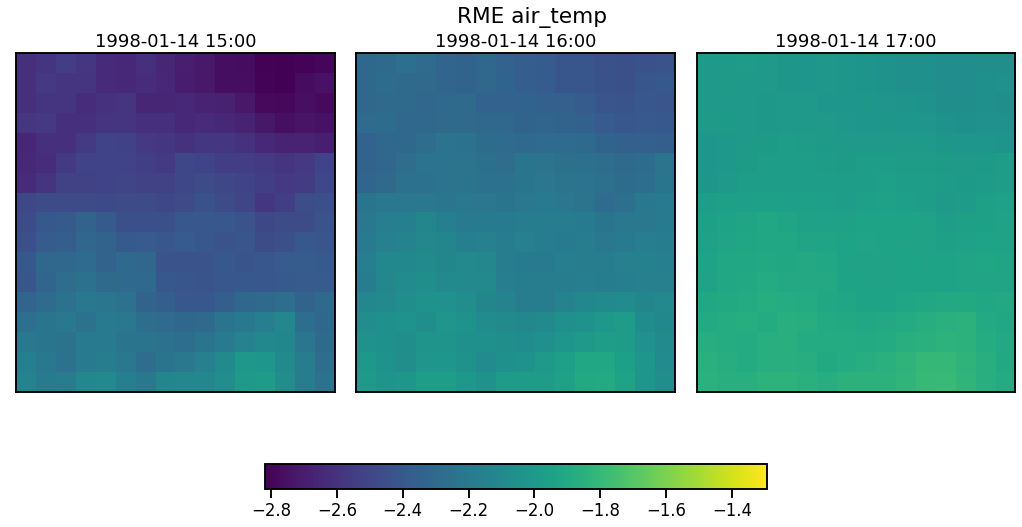

In [3]:
# air temp
plot_gold('air_temp')

Min: 0.0, Max: 124.95307922363281


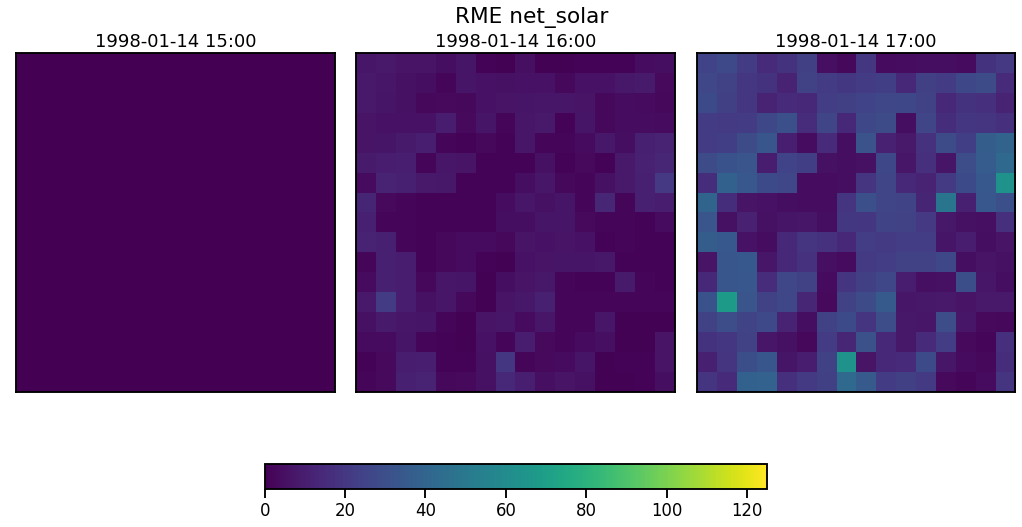

In [13]:
plot_gold('net_solar')

Min: 0.0, Max: 1.0


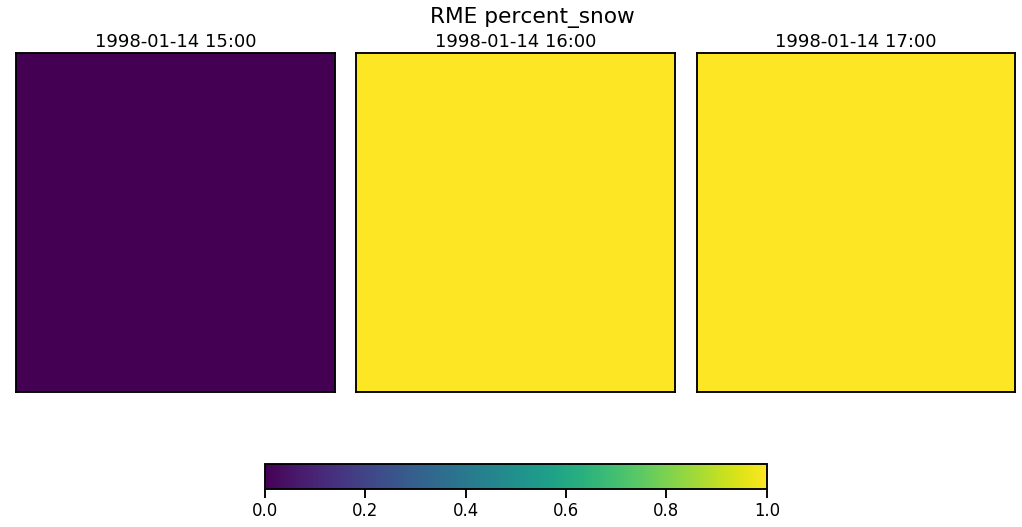

In [5]:
plot_gold('percent_snow')

Min: -2.9219934940338135, Max: -1.294613003730774


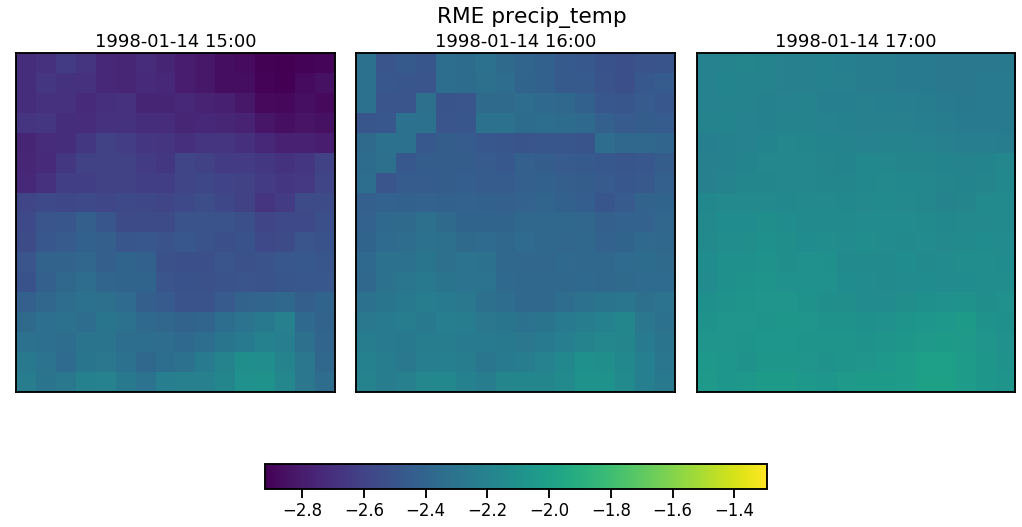

In [6]:
plot_gold('precip_temp')

Min: 0.0, Max: 6.30874490737915


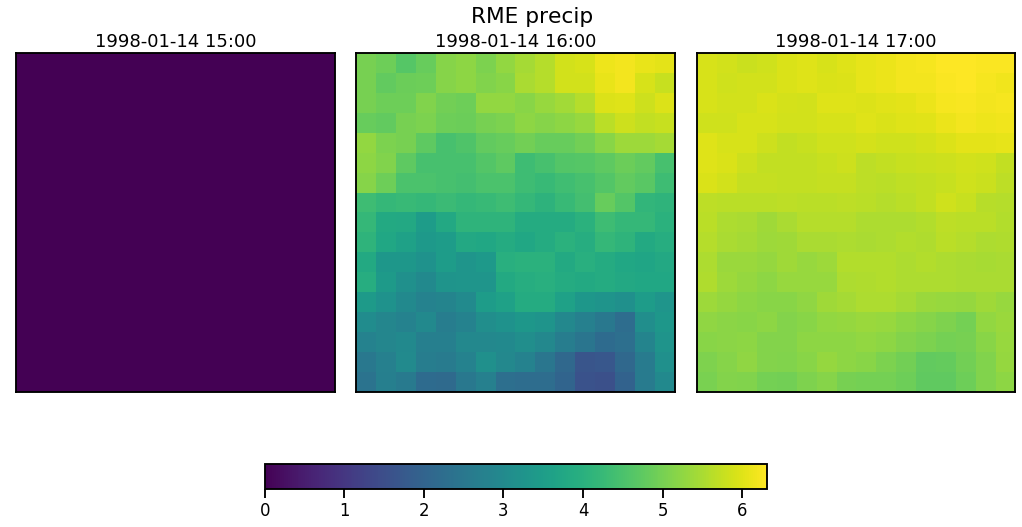

In [7]:
plot_gold('precip')

Min: 0.0, Max: 167.22219848632812


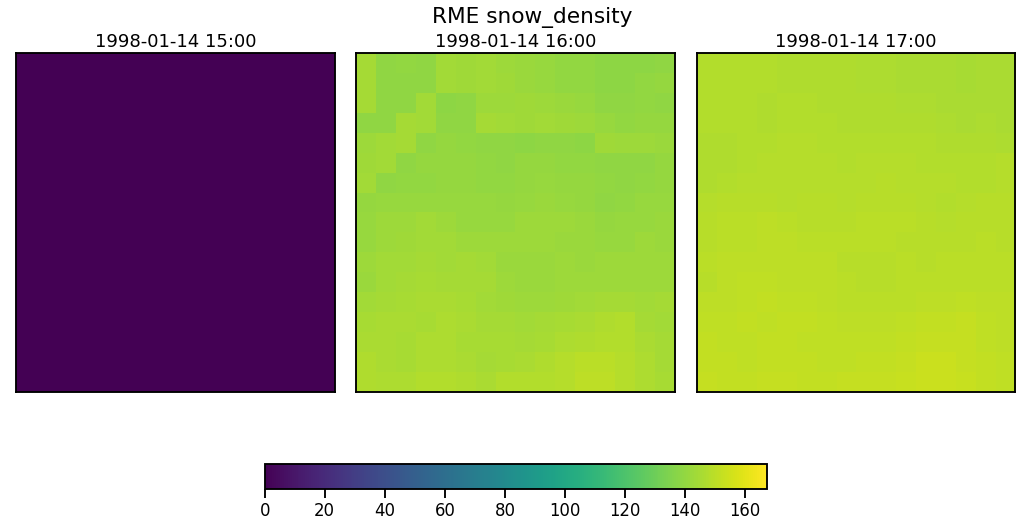

In [8]:
plot_gold('snow_density')

Min: 238.05897521972656, Max: 289.9817810058594


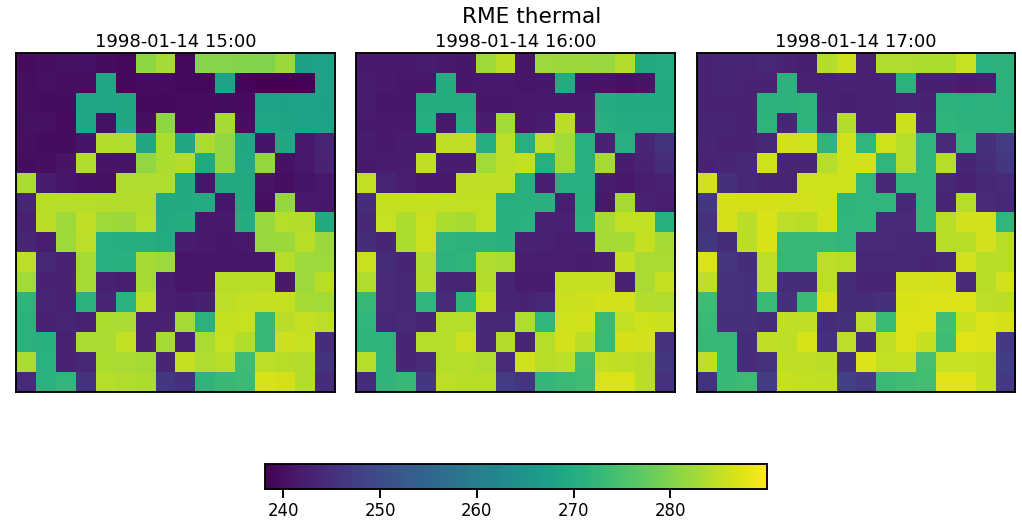

In [9]:
plot_gold('thermal')

Min: 478.78216552734375, Max: 548.6337890625


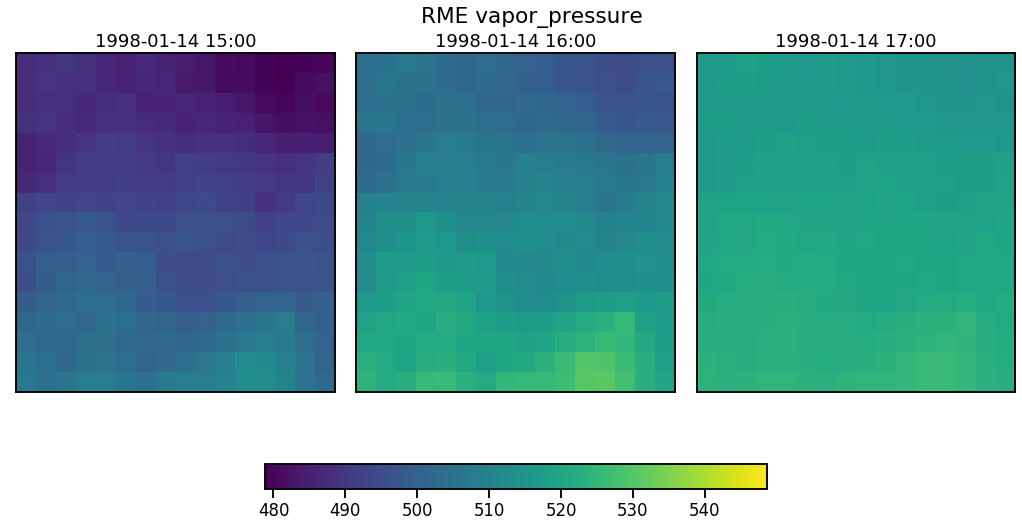

In [10]:
plot_gold('vapor_pressure')

Min: 206.0, Max: 223.0


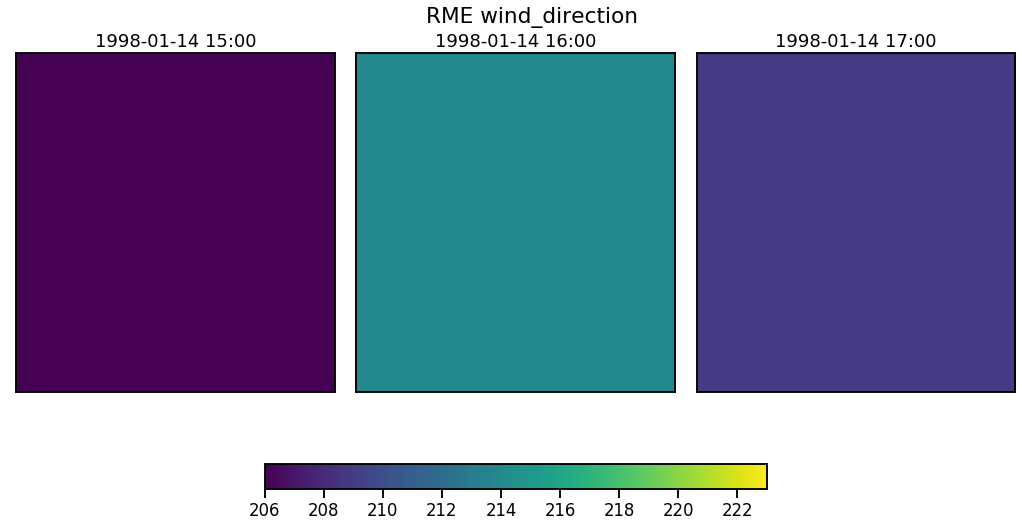

In [11]:
plot_gold('wind_direction')

Min: 1.7999999523162842, Max: 15.29454231262207


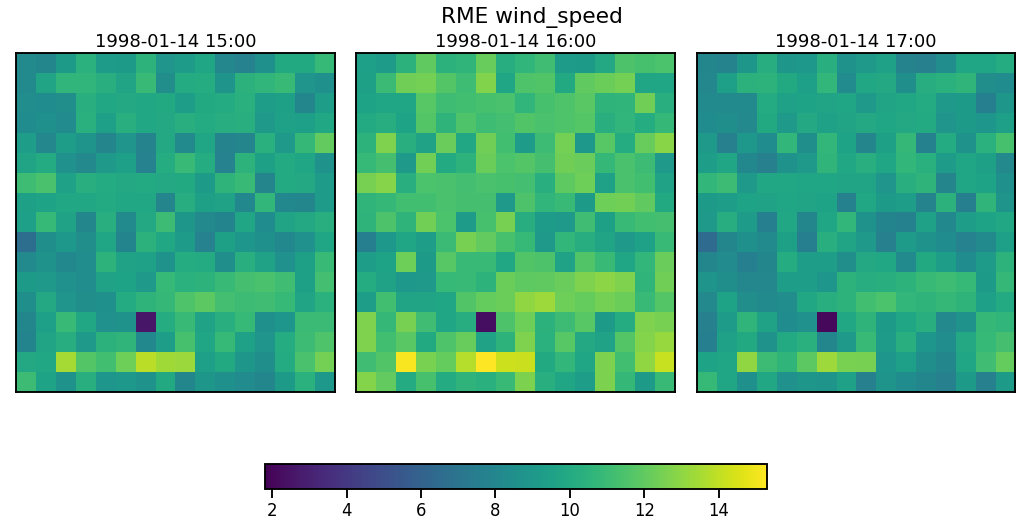

In [12]:
plot_gold('wind_speed')